<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from keras.datasets  import mnist
from keras.datasets  import cifar100
import matplotlib.pyplot as plt
from keras import models  
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
x_train.shape
x_test.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

In [55]:
from keras.models import Sequential
from keras.layers import Dense

x_train = x_train.reshape(50000,32,32,3)
x_test= x_test.reshape(10000,32,32,3)

In [56]:
x_train_1= x_train.astype('float32')/255

x_test_1= x_test.astype('float32')/255

from keras.utils import to_categorical 
y_train_1= to_categorical(y_train,100)
y_test_1= to_categorical(y_test,100)
print(y_train)

[[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]


In [57]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=64 #lô
epochs=20     #số lần học
classes=100    #phân loại

In [58]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

In [59]:
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2),padding='same'))

In [60]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(Dropout(0.25))
model.add(Dense(1000,activation='linear'))
model.add(Dense(500,activation='linear'))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 128)        

In [61]:
train=model.fit(x_train_1,y_train_1,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
782/782 [==============================] - 5s 5ms/step - loss: 3.6231 - accuracy: 0.1514
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 3.0679 - accuracy: 0.2504
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 2.8763 - accuracy: 0.2880
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 2.7527 - accuracy: 0.3108
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 2.6575 - accuracy: 0.3300
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 2.5806 - accuracy: 0.3468
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 2.5140 - accuracy: 0.3587
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 2.4707 - accuracy: 0.3702
Epoch 9/20
782/782 [==============================] - 4s 6ms/step - loss: 2.4147 - accuracy: 0.3800
Epoch 10/20
782/782 [==============================] - 4s 5ms/step - loss: 2.3692 - accuracy: 0.3898

<Axes: >

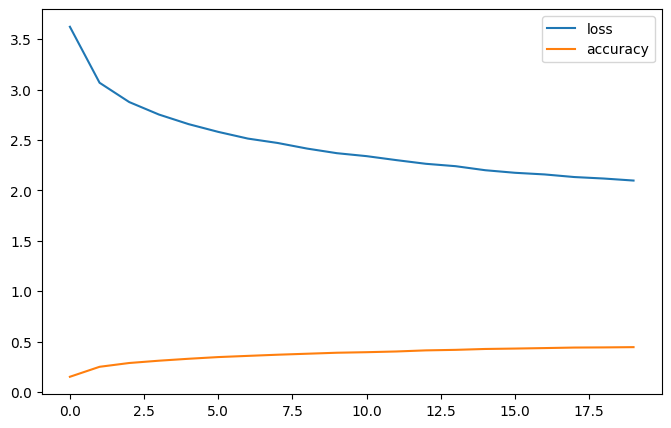

In [62]:
import pandas as pd
pd.DataFrame(train.history).plot(figsize=(8,5))

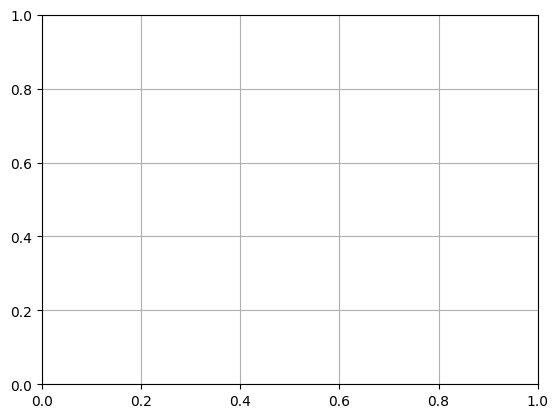

In [63]:
plt.grid(True)

In [65]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/cifar100_dropout.h5")